<a href="https://colab.research.google.com/github/iasmimsilveira/Estudos_dados/blob/main/AT_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AT - Dados para Machine Learning: Feature Engineering

1- Faça a matriz de Correlação dos campos.

2- Plote a matriz de correlação com heatmap.

3- Trate o dataset como achar melhor. (Repare que há campos com null, então qual será sua estratégia? Dropar? Preencher com a média dos valores?)

In [1]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=fedbdfb168411599266bda9ff4175a8ec83afa93e79a12814699556e275e1911
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity


In [3]:
df = pd.read_csv('tenis.csv')
df = df.dropna()
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.head()

,Age,Elo,hard court elo rating,clay-court elo rating,grass-court elo rating,Peak Age,Peak Elo
0,34.5,2185.2,2126.6,2100.8,2063.8,28.8,2470.0
1,25.9,2166.2,2130.7,1940.1,1944.8,25.9,2175.1
2,24.7,2141.3,2099.0,2070.2,1906.4,24.7,2157.9
3,39.9,2043.0,1989.8,1896.3,1928.2,25.6,2382.0
4,18.5,2029.5,1967.9,1932.0,1735.5,18.5,2029.5


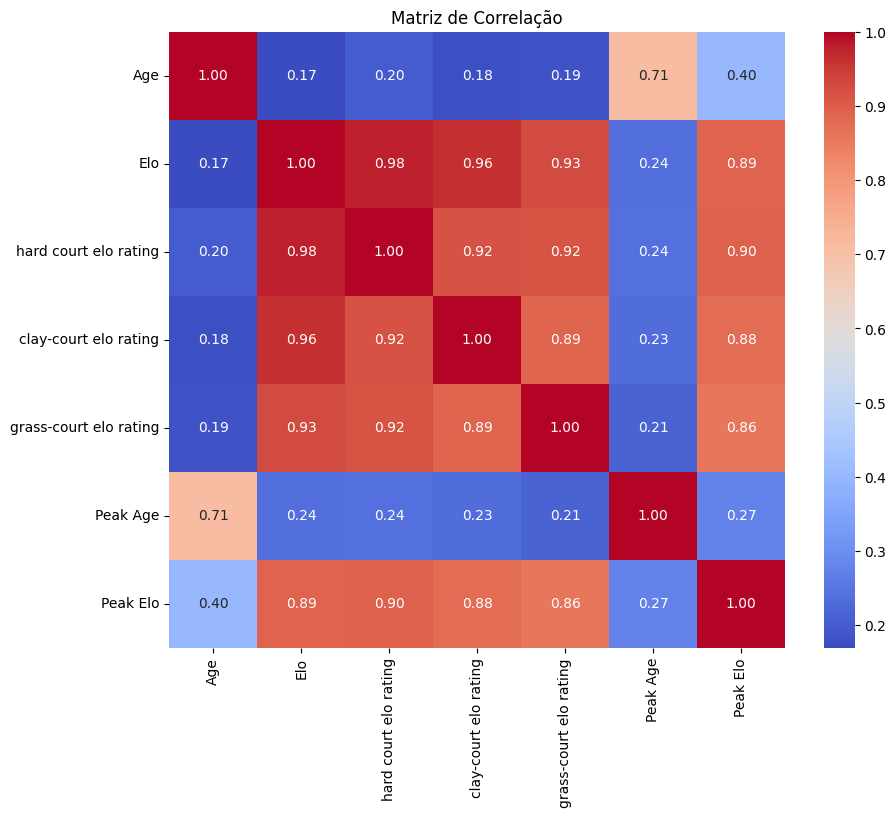

In [4]:
# Calcular matriz de correlação
correlation_matrix = df_numeric.corr()

# Plotar heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de Correlação')
plt.show()


In [5]:
df = pd.read_csv('tenis.csv')

all_columns = df.columns

numeric_columns = df.select_dtypes(include=[np.number]).columns

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

print(df.dtypes)

Player                     object
Age                       float64
Elo                       float64
HardRaw                    object
ClayRaw                    object
GrassRaw                   object
hard court elo rating     float64
clay-court elo rating     float64
grass-court elo rating    float64
Peak Age                  float64
Peak Elo                  float64
Gender                     object
dtype: object


In [6]:
df = pd.read_csv('tenis.csv')
df = df.apply(pd.to_numeric, errors='coerce')

print(df.dtypes)

Player                    float64
Age                       float64
Elo                       float64
HardRaw                   float64
ClayRaw                   float64
GrassRaw                  float64
hard court elo rating     float64
clay-court elo rating     float64
grass-court elo rating    float64
Peak Age                  float64
Peak Elo                  float64
Gender                    float64
dtype: object


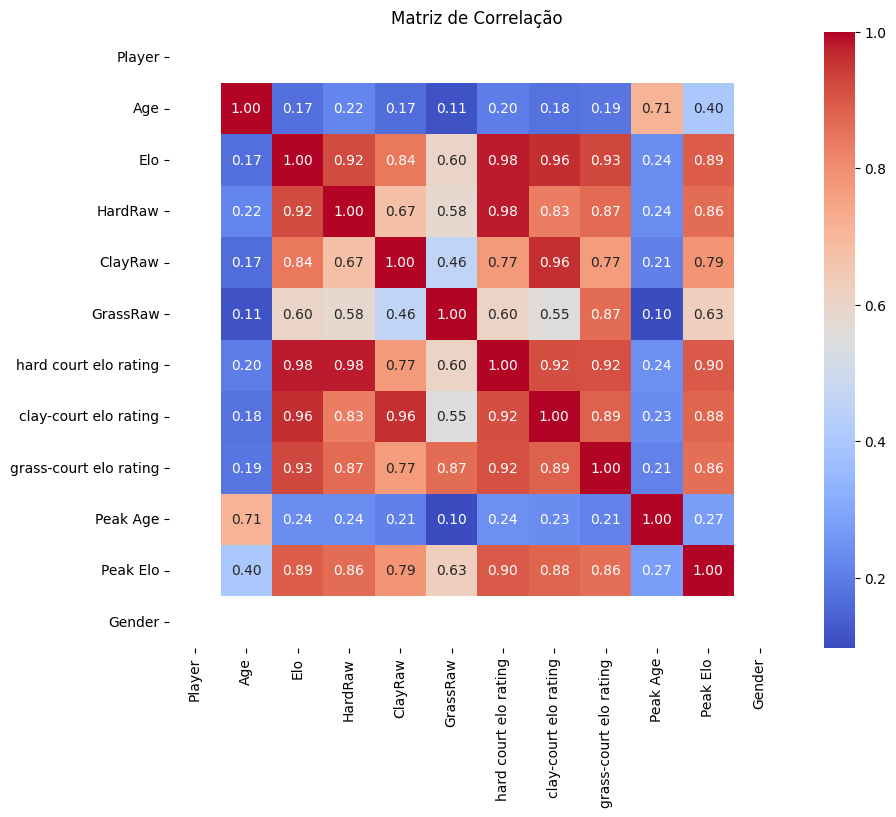

In [7]:
df = df.apply(pd.to_numeric, errors='coerce')
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de Correlação')
plt.show()

4- Calcule o KMO do dataset.

In [8]:
kmo_all, kmo_model = calculate_kmo(df_numeric)
print(f"KMO global: {kmo_model}")

KMO global: 0.7547872405513267


5- Calcule o Bartlett Sphericity do Dataset.

In [9]:
chi_square_value, p_value = calculate_bartlett_sphericity(df_numeric)
print(f"Valor qui-quadrado: {chi_square_value}")
print(f"P-valor: {p_value}")

Valor qui-quadrado: 8745.038719365695
P-valor: 0.0


6- Normalize as colunas.


In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)
scaled_data

array([[ 1.66210952,  3.19037749,  3.18215254, ...,  3.91986416,
         1.46581588,  3.84025918],
       [-0.15994155,  3.09286198,  3.20348535, ...,  3.10826867,
         0.63926739,  2.396579  ],
       [-0.41418123,  2.96506534,  3.03854634, ...,  2.84637567,
         0.29724732,  2.31237656],
       ...,
       [-0.52011443, -2.59280544, -2.45283013, ..., -2.29941255,
        -0.98532792, -2.39512723],
       [-1.32520676, -2.70828433, -1.99391465, ..., -2.0191052 ,
        -2.46741487, -2.52877413],
       [ 0.32735118, -2.72778743, -2.44658639, ..., -2.11595105,
        -1.61236471, -2.23357604]])

7- Utilize o PCA com a mesma quantidade de dimensões do Dataset.


In [11]:
pca = PCA(n_components=df_numeric.shape[1])
pca.fit(scaled_data)

PCA(n_components=7)

8- Imprima um Screenplot com a variância de cada fator.


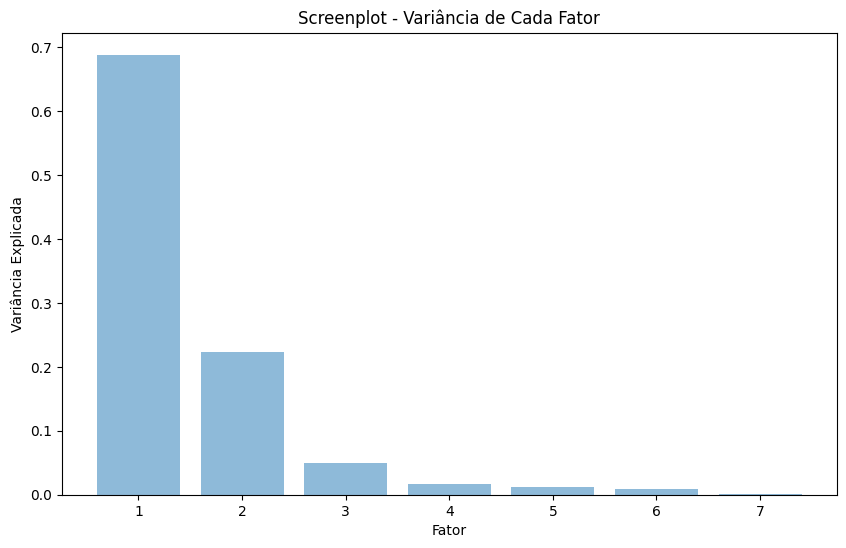

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, df_numeric.shape[1] + 1), pca.explained_variance_ratio_, alpha=0.5)
plt.xlabel('Fator')
plt.ylabel('Variância Explicada')
plt.title('Screenplot - Variância de Cada Fator')
plt.show()

9- Imprima um Screenplot com a variância acumulada.


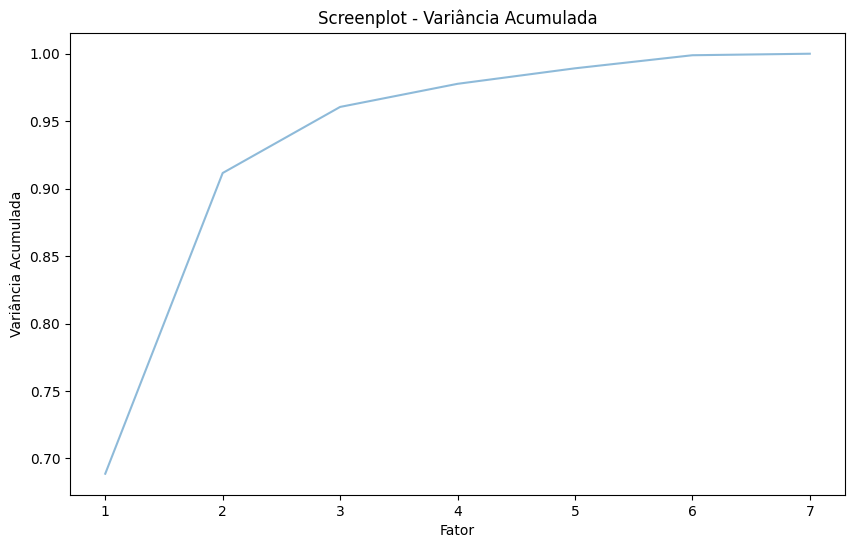

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, df_numeric.shape[1] + 1), np.cumsum(pca.explained_variance_ratio_), alpha=0.5)
plt.xlabel('Fator')
plt.ylabel('Variância Acumulada')
plt.title('Screenplot - Variância Acumulada')
plt.show()

10- Calcule os autovalores.


In [14]:
eigenvalues = pca.explained_variance_
eigenvalues

array([4.82664531, 1.56249633, 0.3433372 , 0.12007242, 0.08055459,
       0.06796706, 0.00787849])

11- Com o método de raízes latentes, defina quantos fatores serão utilizados para criar o ranking e imprima o Screenplot.


In [16]:
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(scaled_data)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

12- Calcule a carga fatorial dos fatores.


In [17]:
loadings = fa.loadings_

In [ ]:
loadings

array([[ 0.1097591 ,  0.79174815,  0.30758042],
       [ 0.99697589,  0.0885536 , -0.03826323],
       [ 0.9674131 ,  0.10962339,  0.02187294],
       [ 0.94860565,  0.09658432,  0.00399853],
       [ 0.92755853,  0.09037717,  0.03475594],
       [ 0.145205  ,  0.96366006, -0.21281285],
       [ 0.89144137,  0.23477754,  0.38130332]])

13- Calcule os scores fatoriais.


In [18]:
scores = fa.transform(scaled_data)
scores

array([[ 3.13650305,  1.4157235 ,  1.74000285],
       [ 3.1766963 ,  0.01643424, -0.9139555 ],
       [ 2.80078368, -0.26058784, -0.5083471 ],
       ...,
       [-2.70936953, -0.59539287,  0.22399427],
       [-2.83165705, -1.95693382,  0.94260823],
       [-2.6102221 , -1.02994656,  0.99057109]])

14- Imprima o ranking.

In [20]:
for i in range(fa.n_factors):
  print(f"Fator {i + 1}:")
  for j in range(loadings.shape[1]):
    print(f"{df_numeric.columns[j]}: {loadings[i, j]}")

Fator 1:
Age: 0.10975910475449513
Elo: 0.7917481510967319
hard court elo rating: 0.30758041944904946
Fator 2:
Age: 0.9969758945571664
Elo: 0.0885536011259569
hard court elo rating: -0.03826322980337623
Fator 3:
Age: 0.9674130978029104
Elo: 0.10962338647009857
hard court elo rating: 0.021872938906658757
